# Setting up Kaggle Environment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test_features.csv
/kaggle/input/train_salaries.csv
/kaggle/input/train_features.csv


In [2]:
!pwd
#os.chdir("input")
#os.listdir()
#!pwd
#

/kaggle/working


# Salary Predictions

# Part 1 - DEFINE

### ---- 1 Defining the problem ----

The goal of this project is to predict the salary of a new job posting by examining the dataset of job postings and by building a model to predict the salaries for the job postings in the test_salaries dataset.

The tool used id Python 3 with it libraries and packages for data manipulation, data visulisation and  developing predictive modelling algorithms.

In [3]:
#my info
__author__ = "Ahsana Ahffan"
__email__ = "ahsanahf@gmail.com"

In [4]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os as os
%matplotlib inline
sns.set()

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [5]:
#load the data into a Pandas dataframe
train_features_df=pd.read_csv("/kaggle/input/train_features.csv")
test_features_df=pd.read_csv("/kaggle/input/test_features.csv")
train_salaries_df=pd.read_csv("/kaggle/input/train_salaries.csv")

In [6]:
train_features_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [7]:
#Preview of dataframes
train_features_df.head(7)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24


In [8]:
test_features_df.head(7)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32


In [9]:
train_salaries_df.head(7)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178


In [10]:
#Use info to see length and datatypes
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [12]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [13]:
#Merge train features dataframe and train salaries dataframe on jobId
train_df=pd.merge(train_features_df,train_salaries_df,on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 3 Clean the data ----

In [15]:
#look for duplicate data
train_df.duplicated().sum()

0

In [16]:
test_features_df.duplicated().sum()

0

In [17]:
#Check for entries with salary<=0
(train_df.salary<=0).sum()

5

In [18]:
#Remove those entries with salary<=0
train_df=train_df[(train_df.salary>0)]
train_data=train_df.copy()
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [19]:
len(train_df)

999995

### ---- 4 Explore the data (EDA) ----

In [20]:
#Identify numerical and categorical varibales
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [21]:
test_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [22]:
numeric_cols=['yearsExperience','MilesFromMetropolis']
categorical_cols=['companyId','jobType','degree','major','industry']

In [23]:
#Summarize numericaland categorical variables separately
train_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [24]:
train_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685075125,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


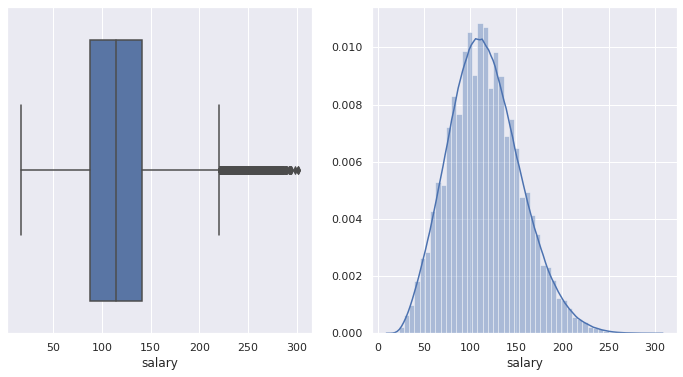

In [25]:
#Visualize target variable distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(train_df['salary'])
plt.show()

From the above visualization we can infer that although most of the data are somewhere between 75 and 150, there are some potential outliers

In [26]:
#Use 1.5 IQR rule to find outliers
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5*IQR
lower = stat['25%'] - 1.5*IQR
print('Upper bound: {},Lower bound:{}'.format(upper,lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
Upper bound: 220.5,Lower bound:8.5


In [27]:
#Check potential outlier below lower bound
print(train_df[train_df.salary < 8.5])

Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis, salary]
Index: []


Since there is no data with salary below lower bound, we don't need to remove any entries

In [28]:
#Check number of potential outliers above upper bound for each jobtype
train_df.loc[train_df.salary>220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

There are positions with jobType 'Junior' and salary above upper bound which makes them suspicious outliers

In [29]:
#Check for suspicious potential outliers above upper bound
print(train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')])

                   jobId companyId jobType     degree        major industry  \
1222    JOB1362684408909    COMP40  JUNIOR    MASTERS      COMPSCI      OIL   
27710   JOB1362684435397    COMP21  JUNIOR   DOCTORAL  ENGINEERING      OIL   
31355   JOB1362684439042    COMP45  JUNIOR   DOCTORAL      COMPSCI  FINANCE   
100042  JOB1362684507729    COMP17  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
160333  JOB1362684568020    COMP18  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
189582  JOB1362684597269    COMP32  JUNIOR   DOCTORAL     BUSINESS      OIL   
214606  JOB1362684622293    COMP47  JUNIOR    MASTERS     BUSINESS  FINANCE   
303778  JOB1362684711465    COMP51  JUNIOR    MASTERS  ENGINEERING      WEB   
348354  JOB1362684756041    COMP56  JUNIOR   DOCTORAL  ENGINEERING      OIL   
427593  JOB1362684835280    COMP54  JUNIOR   DOCTORAL  ENGINEERING  FINANCE   
500739  JOB1362684908426    COMP40  JUNIOR   DOCTORAL  ENGINEERING      OIL   
627534  JOB1362685035221     COMP5  JUNIOR   DOCTORA

By examining the above data it is clear that eventhough the jobType is JUNIOR, all these employees has atleast 18 years of experience and majority of them has masters and doctoral degree. So the data should be good and no need to remove any entries

In [30]:
#Define a function to plot the relation between features and the target
def plots(df,col):
    plt.figure(figsize=[6,14])
    plt.subplot(3,1,2)
    if df[col].dtype=='int64' or col == 'companyId':
        mean=df.groupby([col])['salary'].mean().plot()
        plt.xlabel(col)
        plt.ylabel("Mean Salary")
        plt.subplot(3,1,1)
        df[col].value_counts().sort_index().plot()
        plt.xticks(rotation=20)
        plt.xlabel(col)
        plt.ylabel("Counts")
    else:
        mean=df.groupby(by=[col])['salary'].mean().sort_values(ascending=True).index
        sns.boxplot(x=col,y="salary",data=df,order=mean)
        plt.xticks(rotation=20)
        plt.subplot(3,1,1)
        df[col].value_counts().sort_index().plot()
        plt.xticks(rotation=20)
        plt.xlabel(col)
        plt.ylabel("Counts")
    

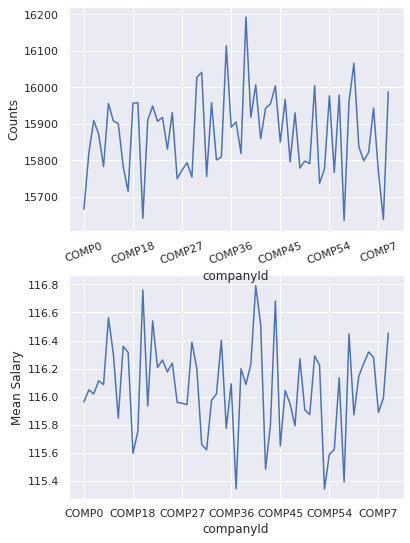

In [31]:
plots(train_df,'companyId')

From the above plot of companyId against the mean salary,we can infer that salary dont have much correlation with the feature companyId

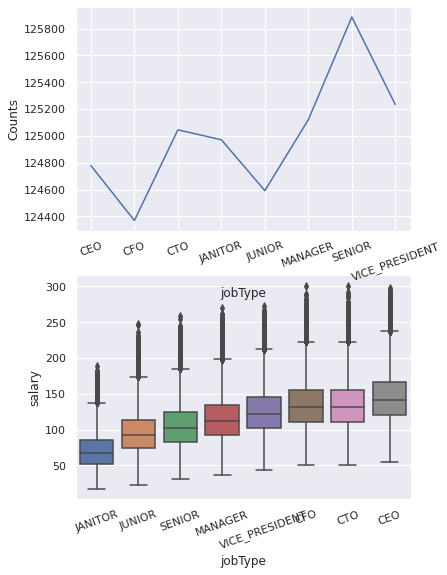

In [32]:
plots(train_df,"jobType")

From the above plots we can find a positive relation between jobType and salary. Higher the job position,higher is the salary

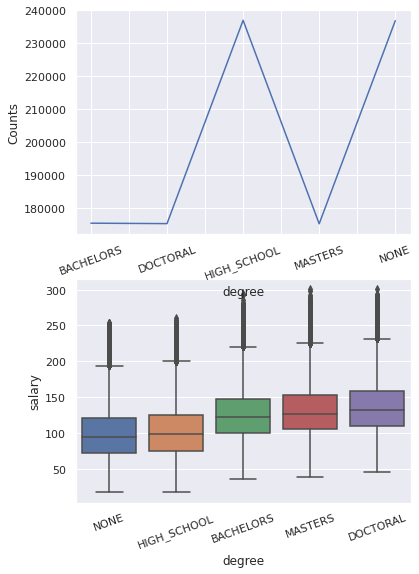

In [33]:
plots(train_df,"degree")

It is clear from the plots that employee with highest degree and has the highest salary and thos with lowest degree has the lowest salary. That is salary increases with the level of education attained

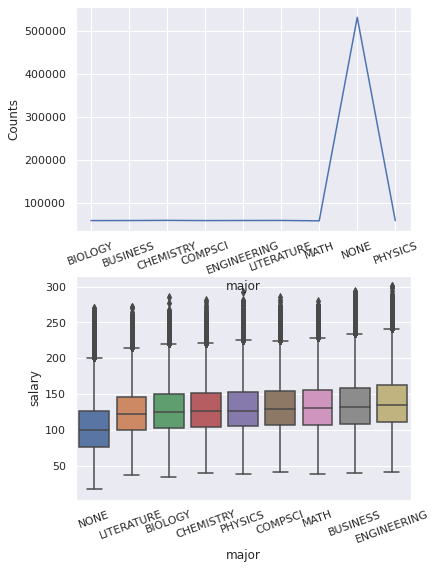

In [34]:
plots(train_df,"major")

The plot shows that there is a slight difference in the salaries of employees with different major. Those with an engineering major has the highest salary and those with no major has the lowest salary 

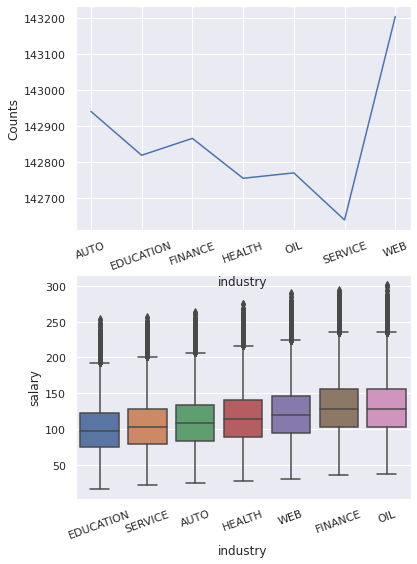

In [35]:
plots(train_df,"industry")

It is clear from the above plots that different industry has different salary range for their employees. Oil industry gives the highest salary  while those works in the education sector receives the lowest salary

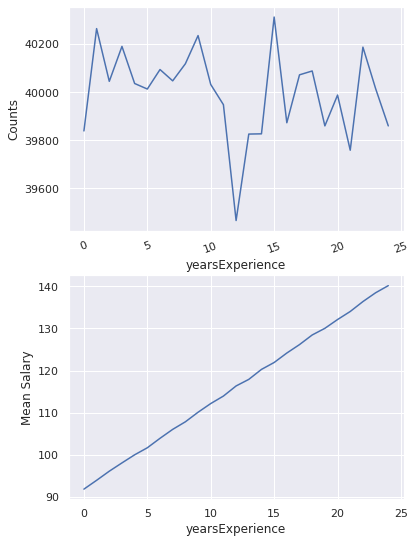

In [36]:
plots(train_df,"yearsExperience")

It is very clear from the plot that years of experience has a direct positive relation between the salary

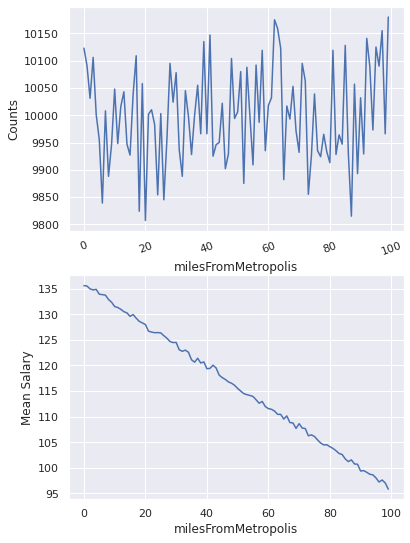

In [37]:
plots(train_df,"milesFromMetropolis")

From the above plot we can infer that employees who are close to metropolis are paid higher that those who are away from metropolis. That is milesFromMetropolis feature is inversly related to the target,salary

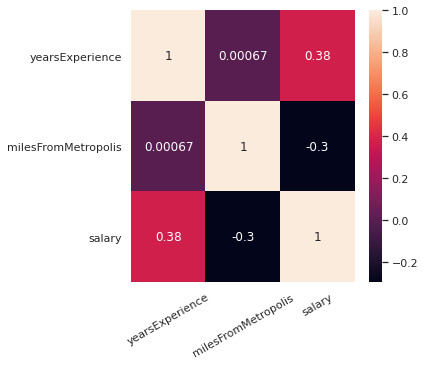

In [38]:
#Explore correlation between features
fig=plt.figure(figsize=[5,5])
corr=train_df.corr()
sns.heatmap(corr,annot=True)
plt.xticks(rotation=30)
plt.show()

In [39]:
#Drop the jobid column
train_df=train_df.drop('jobId',axis=1)

In [40]:
train_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [41]:
#Separate categorical and numeric features
cat_var=train_df.select_dtypes(exclude='int64')
num_var=train_df.select_dtypes(include='int64')

In [42]:
#convert Categorical variables to dummy variables
cat_var=pd.get_dummies(cat_var)

In [43]:
#Concatenate dummy variables and numeric variables to get train dataframe for modelling 
train=pd.concat([cat_var,num_var],axis=1)

In [44]:
#Drop jobid from test data

test_df=test_features_df.drop('jobId',axis=1)

In [45]:
cat_test=test_df.select_dtypes(exclude='int64')
num_test=test_df.select_dtypes(include='int64')

In [46]:
#Convert categorical variables of test data to dummy variables 
cat_test=pd.get_dummies(cat_test)

In [47]:
#Concatenate dummy variables and numeric variables to get test dataframe for predicting salaries 
test_df=pd.concat([cat_test,num_test],axis=1)

### ---- 5 Establish a baseline ----

In [48]:
#import libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score,KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [49]:
#Save target variable in a separate dataframe t 
target_var='salary'
target_df=train_df['salary']

In [50]:
#Drop target column from train data
train=train.drop('salary',axis=1)

## Part 3 - DEVELOP

### ---- 6 Create models and Test models ----

### Linear Regression

In [51]:
#Cross validation on linear regression model

n_folds=5
kf=KFold(n_folds,shuffle=True,random_state=15)
lr=LinearRegression()
lr.fit(train,target_df)
neg_mse=cross_val_score(lr,train,target_df,scoring="neg_mean_squared_error",cv=kf)
mean_mse= -1.0*neg_mse.mean()
print("Mean MSE for Linear Regression Model:{}".format(mean_mse))

Mean MSE for Linear Regression Model:384.43999775960094


### Decision Tree Regressor

In [52]:
#Cross validation on Random Forest model
n_folds=5
kf=KFold(n_folds,shuffle=True,random_state=15)
dt = tree.DecisionTreeRegressor()
neg_mse=cross_val_score(dt,train,target_df,scoring="neg_mean_squared_error",cv=kf)
mean_mse= -1.0*neg_mse.mean()
print("Mean MSE for Decision Tree Regressor:{}".format(mean_mse))

Mean MSE for Decision Tree Regressor:700.4510250120695


### Gradient Boosting Regression

In [53]:
#Cross validation on Gradient Boosting model
n_folds=5
kf=KFold(n_folds,shuffle=False,random_state=None).get_n_splits(train_df)
gbr=GradientBoostingRegressor(n_estimators=200,max_depth=5)
neg_mse=cross_val_score(gbr,train,target_df,scoring="neg_mean_squared_error",cv=kf)
mean_mse= -1.0*np.mean(neg_mse)
print("Mean MSE for Gradient Boosting Regressor:{}".format(mean_mse))

Mean MSE for Gradient Boosting Regressor:356.38263687433164


Gradient Boosting Regreesor with lowest MSE is the best model for our data.

## Part 4 - DEPLOY

In [54]:
#Train model on entire data set
gbr.fit(train,target_df)

#Create predictions based on test data
predictions=gbr.predict(test_df)

NameError: name 'model' is not defined

In [ ]:
#Save predictions to a csv file
np.savetxt('salary_predictions.csv', predictions, delimiter=',')

In [ ]:
#Feature importances
importances = pd.Series(gbr.feature_importances_, index=train.columns)
importances.nlargest(10).plot(kind='bar', figsize=(12,6))
plt.show()

#save feature importances to a csv file
np.savetxt('feature_importances.csv', importances, delimiter=',')


From the above plot we can infer that the feature yearsExperince is the most important feature in deciding the salary of a new employee followed by milesFromMetropolis